In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Función para convertir el string del diccionario a un diccionario real
def convertir_a_dict(texto):
    try:
        return ast.literal_eval(texto)
    except (ValueError, SyntaxError):
        return None

# Leer el archivo CSV
df = pd.read_csv('cryptos_data_full.csv')

# Convertir la columna 'quote' en un diccionario
df['quote_dict'] = df['quote'].apply(convertir_a_dict)

# Eliminar filas con datos inválidos
df = df[df['quote_dict'].notnull()]

# Expandir la columna 'quote_dict' en nuevas columnas
df_quote = pd.json_normalize(df['quote_dict'])

# Unir las nuevas columnas con el dataframe original
df_final = pd.concat([df.drop(columns=['quote', 'quote_dict']), df_quote], axis=1)

df = df_final.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        900 non-null    int64  
 1   name                      900 non-null    object 
 2   symbol                    900 non-null    object 
 3   slug                      900 non-null    object 
 4   num_market_pairs          900 non-null    int64  
 5   date_added                900 non-null    object 
 6   tags                      831 non-null    object 
 7   max_supply                472 non-null    float64
 8   circulating_supply        900 non-null    float64
 9   total_supply              900 non-null    float64
 10  platform                  685 non-null    object 
 11  price                     900 non-null    float64
 12  volume_24h                900 non-null    float64
 13  volume_change_24h         900 non-null    float64
 14  percent_ch

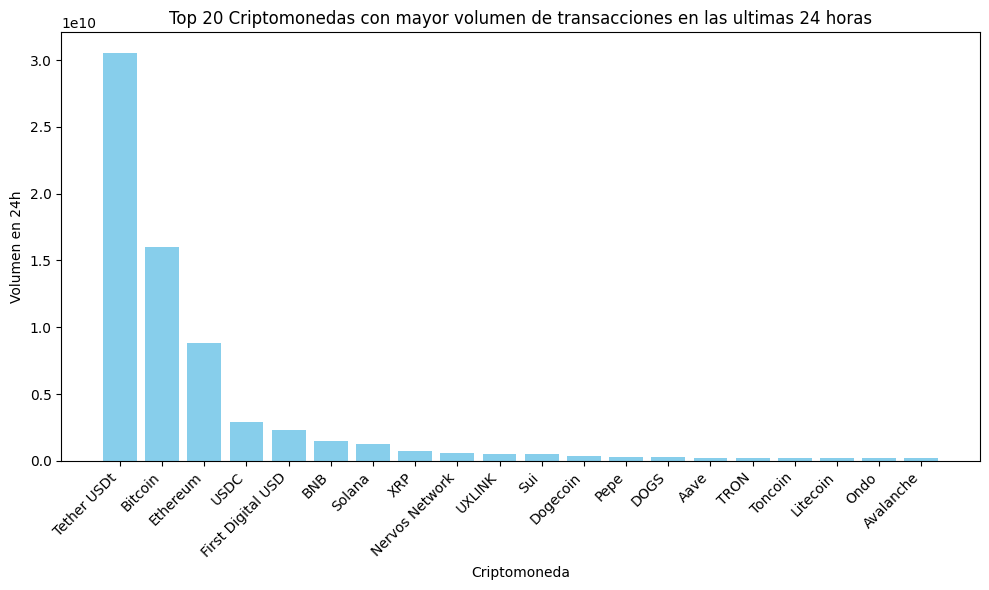

In [ ]:
# Visualizamos el volumen de transacciones en 24 horas de 20 criptomonedas

# Ordenar las criptomonedas por volume_24h de mayor a menor y seleccionar las top 20
df_sorted = df.sort_values(by='volume_24h', ascending=False).head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['name'], df_sorted['volume_24h'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Criptomoneda')
plt.ylabel('Volumen en 24h')
plt.title('Top 20 Criptomonedas con mayor volumen de transacciones en las ultimas 24 horas')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

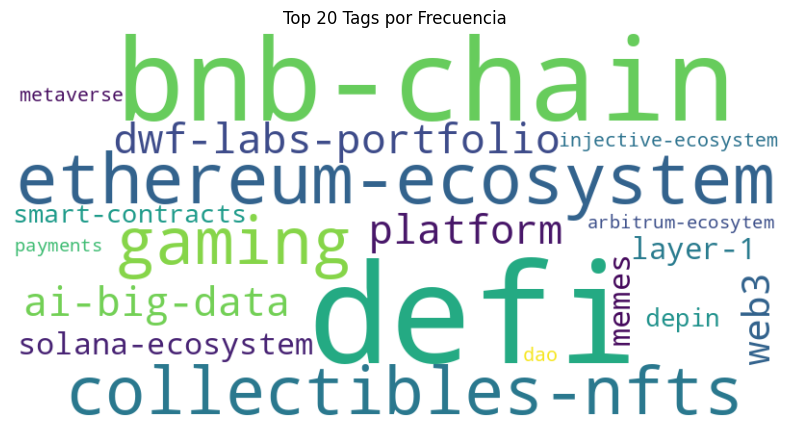

In [ ]:
# Los 20 tags mas repetidos

# Rellenar valores NaN con una cadena vacía y asegurarse de que la columna sea de tipo string
df['tags'] = df['tags'].fillna('').astype(str)

# Dividir los tags en listas
df['tags_list'] = df['tags'].str.split(', ')

# Filtrar listas vacías y contar la frecuencia de cada tag
all_tags = [tag for sublist in df['tags_list'] if isinstance(sublist, list) for tag in sublist]
tag_counts = Counter(all_tags)

# Obtener los 20 tags más frecuentes
top_20_tags = tag_counts.most_common(20)

# Crear un diccionario de palabras y sus frecuencias
word_freq = dict(top_20_tags)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Top 20 Tags por Frecuencia')
plt.show()

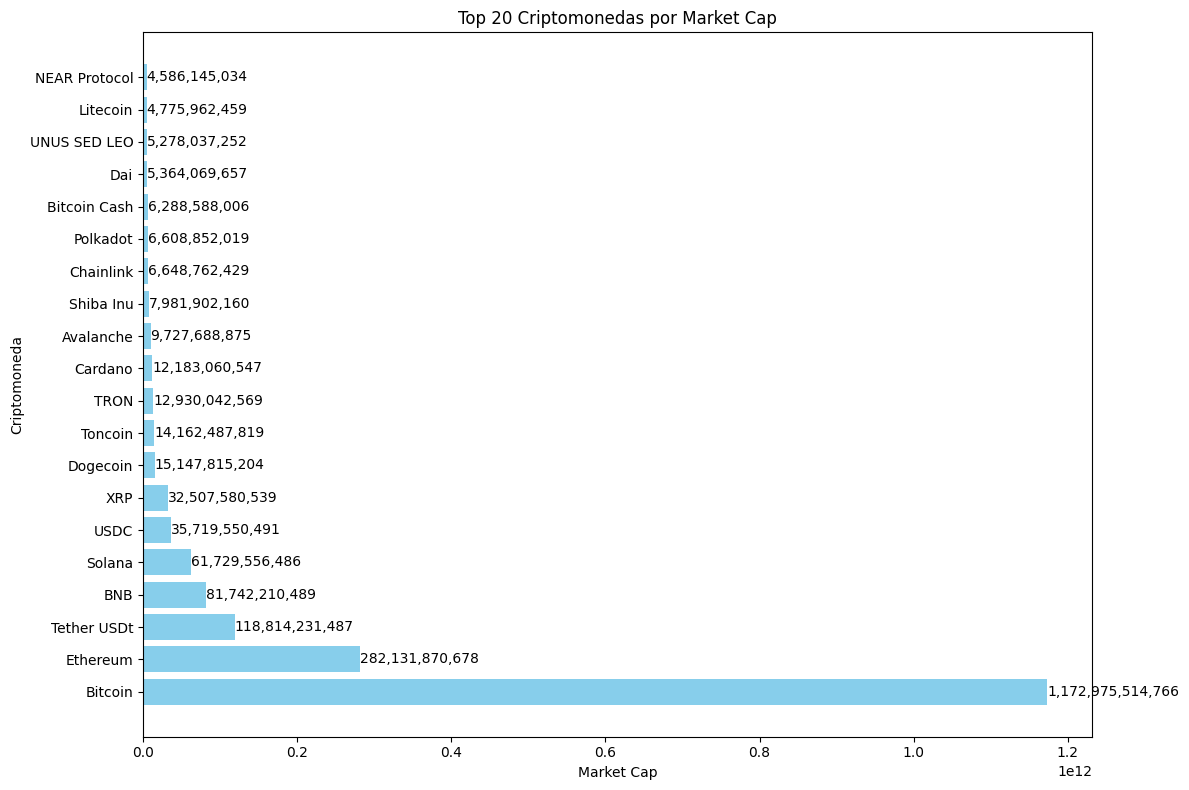

In [ ]:
# Criptomonedas con mayor market_cap (20)

# Ordenar las criptomonedas por market_cap de mayor a menor y seleccionar las top 20
df_sorted = df.sort_values(by='market_cap', ascending=False).head(20)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['name'], df_sorted['market_cap'], color='skyblue')

# Añadir los valores de market_cap al final de cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}',  # Formato de número con separador de miles
             va='center', ha='left', fontsize=10, color='black')

# Añadir etiquetas y título
plt.xlabel('Market Cap')
plt.ylabel('Criptomoneda')
plt.title('Top 20 Criptomonedas por Market Cap')

# Ajustar el diseño para que todo se vea bien
plt.tight_layout()
plt.show()